In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

# LOADING THE DATA

In [2]:
gen_train = pd.read_csv(r"C:\Users\Venki\talkingdata-mobile-user-demographics\gender_age_train.csv\gender_age_train.csv")
gen_test = pd.read_csv(r"C:\Users\Venki\talkingdata-mobile-user-demographics\gender_age_test.csv\gender_age_test.csv")
gen_train.head(3)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


In [3]:
print(gen_train.shape)
print(gen_test.shape)

(74645, 4)
(112071, 1)


In [4]:
#https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/22186
phone = pd.read_csv("English_phone_brand_device_model.csv")
print(phone.shape)
phone.head()

(187245, 3)


,device_id,phone_brand,device_model
0,-8890648629457979026,xiaomi,??
1,1277779817574759137,xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,????
4,-5019277647504317457,samsung,Galaxy Note 2


In [5]:
app_label = pd.read_csv(r"C:\Users\Venki\talkingdata-mobile-user-demographics\app_labels.csv\app_labels.csv")
print(app_label.shape)
app_label.head()

(459943, 2)


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [6]:
events = pd.read_csv(r"C:\Users\Venki\talkingdata-mobile-user-demographics\events.csv\events.csv",parse_dates=['timestamp'])
print(events.shape)
events.head()

(3252950, 5)


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [7]:
#tying up active hours with devices
tm = events['timestamp']
hours = [g.hour for g in tm]
events['hour'] = hours


In [8]:
events.head()

,event_id,device_id,timestamp,longitude,latitude,hour
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,0
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,0
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,0
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,0


In [9]:
#https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe
#events = events.reset_index()
events['weekday'] = events['timestamp'].dt.dayofweek
events.head()

,event_id,device_id,timestamp,longitude,latitude,hour,weekday
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,0,6
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,6
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,0,6
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,0,6
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,0,6


In [10]:
app_events = pd.read_csv(r"C:\Users\Venki\talkingdata-mobile-user-demographics\app_events.csv\app_events.csv")
print(app_events.shape)
app_events.head()

(32473067, 4)


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [11]:
label_categories = pd.read_csv(r"C:\Users\Venki\talkingdata-mobile-user-demographics\label_categories.csv\label_categories.csv")
print(label_categories.shape)
label_categories.head()

(930, 2)


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


# DATA PREPROCESSING

# CHECKING FOR DUPLICATE VALUES

In [12]:
print('Numbers of duplicated data:', gen_train.duplicated('device_id').sum())

Numbers of duplicated data: 0


In [13]:
print('Numbers of duplicated data:', gen_test.duplicated('device_id').sum())

Numbers of duplicated data: 0


In [14]:
print('Numbers of duplicated data:', phone.duplicated('device_id').sum())
phone.drop_duplicates('device_id', keep='first', inplace=True)
phone.shape

Numbers of duplicated data: 529


(186716, 3)

In [15]:
print(label_categories.duplicated().sum())
label_categories.drop_duplicates(keep='first', inplace=True)
label_categories.shape

0


(930, 2)

In [16]:
print(app_label.duplicated().sum())
app_label.drop_duplicates(keep='first', inplace=True)
app_label.shape

491


(459452, 2)

# CHECKING FOR MISSING DATA

In [17]:
gen_train.isnull().any()

device_id    False
gender       False
age          False
group        False
dtype: bool

In [18]:
gen_test.isnull().any()

device_id    False
dtype: bool

In [19]:
phone.isnull().any()

device_id       False
phone_brand     False
device_model    False
dtype: bool

In [20]:
print(label_categories[label_categories['category'].isnull()])
label_categories.dropna(inplace=True)
label_categories.shape

     label_id category
0           1      NaN
229       248      NaN
245       264      NaN


(927, 2)

In [21]:
app_label.isnull().any()

app_id      False
label_id    False
dtype: bool

In [22]:
app_events.isnull().any()

event_id        False
app_id          False
is_installed    False
is_active       False
dtype: bool

In [23]:
events.isnull().any()

event_id     False
device_id    False
timestamp    False
longitude    False
latitude     False
hour         False
weekday      False
dtype: bool

In [24]:
print('THE FINAL SHAPES ARE')
print(gen_train.shape)
print(gen_test.shape)
print(app_label.shape)
print(events.shape)
print(phone.shape)
print(app_events.shape)

THE FINAL SHAPES ARE
(74645, 4)
(112071, 1)
(459452, 2)
(3252950, 7)
(186716, 3)
(32473067, 4)


# EDA

# MERGING ALL FILES INTO 1 DATAFRAME

# MERGING GENDER TRAIN AND TEST WITH PHONE BRAND

In [25]:
assert (gen_test.shape[0] + gen_train.shape[0]) == phone.shape[0]

In [26]:
train_brand = gen_train.merge(phone, on='device_id', how='left')
#train_brand.set_index('device_id', inplace=True)
print(train_brand.shape)
train_brand.head()

(74645, 6)


,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,xiaomi,??note
4,245133531816851882,M,30,M29-31,xiaomi,MI 3


In [27]:
test_brand = gen_test.merge(phone, on='device_id', how='left')
#test_brand.set_index('device_id', inplace=True)
print(test_brand.shape)
test_brand.head()

(112071, 3)


,device_id,phone_brand,device_model
0,1002079943728939269,xiaomi,xiaominote
1,-1547860181818787117,xiaomi,??2
2,7374582448058474277,huawei,Y523-L176
3,-6220210354783429585,huawei,??6
4,-5893464122623104785,xiaomi,MI 2


M    47904
F    26741
Name: gender, dtype: int64


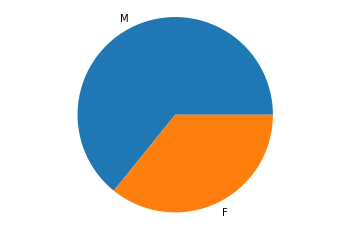

In [28]:
#Create a pie chart for visualization
genders = train_brand.gender.value_counts()
print(genders);

plt.pie(genders.values, labels=genders.keys())
plt.axis('equal')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


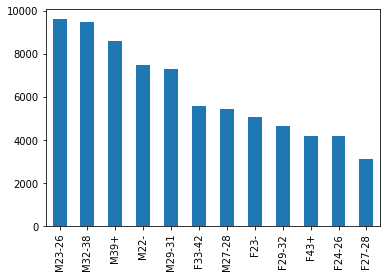

In [29]:
#checking how many users belong to each group
train_brand.group.value_counts().sort_values(ascending=False).plot('bar')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


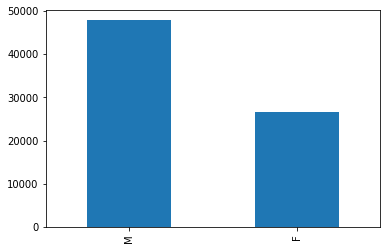

In [30]:
train_brand.gender.value_counts().sort_values(ascending=False).plot('bar')

THE FEMALE USERS ARE LESS WHEN COMPARED TO MALE USERS

In [31]:
len(train_brand['phone_brand'].unique())

80

In [32]:
len(test_brand['phone_brand'].unique())

80

In [33]:
train_brand['phone_brand'].value_counts()

xiaomi     17299
samsung    13669
huawei     12960
OPPO        5783
vivo        5637
           ...  
MIL            1
pner           1
fs             1
mole           1
ZOYE           1
Name: phone_brand, Length: 80, dtype: int64

In [34]:
test_brand['phone_brand'].value_counts()

xiaomi     25808
samsung    20522
huawei     19505
vivo        8705
OPPO        8456
           ...  
?Q             4
PPTV           2
fs             1
MIL            1
E?E?           1
Name: phone_brand, Length: 80, dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


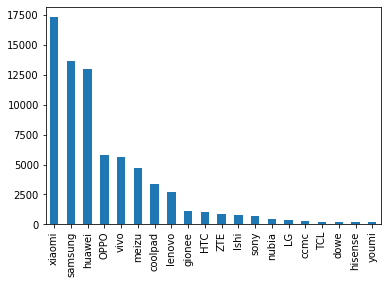

In [35]:
#checking which are more often used in train data
train_brand.phone_brand.value_counts()[:20].sort_values(ascending=False).plot('bar')

THE MAJORITY OF THE USERS 20 OF THE ALL THE 120 BRANDS GIVEN IN THE DATASET

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


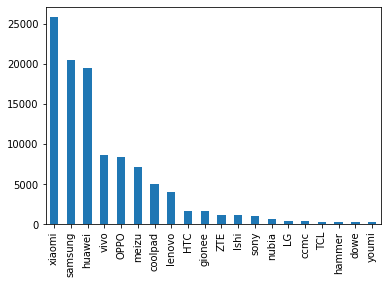

In [36]:
#checking which are more often used in test data
test_brand.phone_brand.value_counts()[:20].sort_values(ascending=False).plot('bar')

THE MAJORITY OF THE USERS 20 OF THE ALL THE 126 BRANDS GIVEN IN THE TEST DATASET

#  APP EVENTS

In [37]:
print(app_events.shape)
app_events.head()

(32473067, 4)


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [38]:
app_events['is_active'].value_counts()

0    19740071
1    12732996
Name: is_active, dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


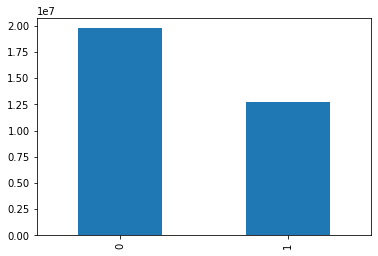

In [39]:
app_events.is_active.value_counts().sort_values(ascending=False).plot('bar')

In [40]:
len(app_events['app_id'].unique())

19237

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


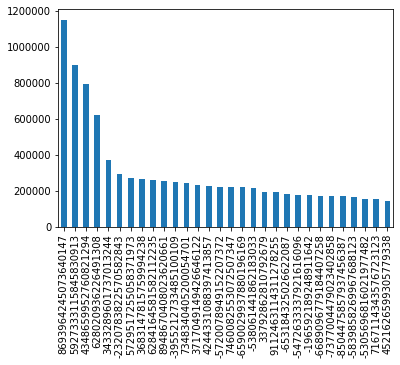

In [41]:
app_events.app_id.value_counts()[:30].sort_values(ascending=False).plot('bar')

In [42]:
len(app_events['event_id'].unique())

1488096

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


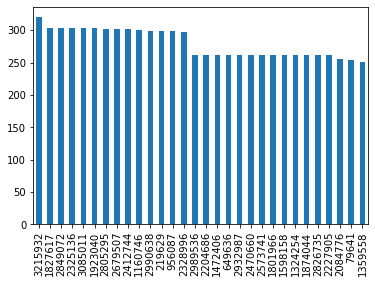

In [43]:
#checking which events are more popular
app_events.event_id.value_counts()[:30].sort_values(ascending=False).plot('bar')

AS THE MAJORITY OF THE APPS ARE NOT ACTIVE SO WE ARE TAKING ONLY THE APPS WHICH ARE ACTIVE

In [44]:
app_events = app_events[app_events.is_active == 1]
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
9,2,7167114343576723123,1,1


In [45]:
#total active apps
len(app_events['app_id'].unique())

10582

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


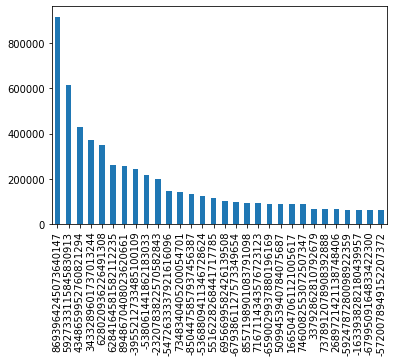

In [46]:
#top 30 apps 
app_events.app_id.value_counts()[:30].sort_values(ascending=False).plot('bar')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


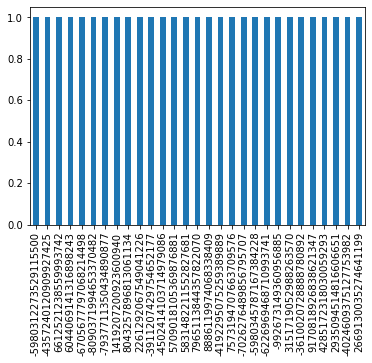

In [47]:
app_events.app_id.value_counts()[-30:-1].sort_values(ascending=False).plot('bar')

# EVENTS

In [48]:
print(events.shape)
events.head()

(3252950, 7)


,event_id,device_id,timestamp,longitude,latitude,hour,weekday
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,0,6
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,6
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,0,6
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,0,6
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,0,6


In [49]:
len(events['device_id'].unique())

60865

In [50]:
len(events['event_id'].unique())

3252950

In [51]:
events['device_id'].value_counts()

 1186608308763918427    33426
 3915082290673137129    14568
-1656894751624916732     6731
-6242501228649113250     4150
-8340098378141155823     3973
                        ...  
 781851599932550953         1
-8126302119835621758        1
-803242747247619527         1
 709247865516551294         1
 4224710574768605050        1
Name: device_id, Length: 60865, dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


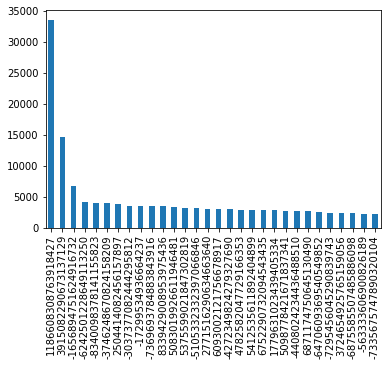

In [52]:
#top 30 devices
events.device_id.value_counts()[:30].sort_values(ascending=False).plot('bar')

In [53]:
for i in range(0,100,10):
    var =events["device_id"].value_counts()
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 1
10 percentile value is 1
20 percentile value is 3
30 percentile value is 6
40 percentile value is 9
50 percentile value is 15
60 percentile value is 24
70 percentile value is 40
80 percentile value is 67
90 percentile value is 130
100 percentile value is  33426


In [54]:
for i in range(90,100):
    var =events["device_id"].value_counts()
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 130
91 percentile value is 141
92 percentile value is 155
93 percentile value is 170
94 percentile value is 190
95 percentile value is 216
96 percentile value is 248
97 percentile value is 297
98 percentile value is 373
99 percentile value is 525
100 percentile value is  33426


In [55]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =events["device_id"].value_counts()
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 525
99.1 percentile value is 553
99.2 percentile value is 587
99.3 percentile value is 635
99.4 percentile value is 701
99.5 percentile value is 773
99.6 percentile value is 853
99.7 percentile value is 959
99.8 percentile value is 1145
99.9 percentile value is 1511
100 percentile value is  33426


99.9%  OF THE DEVICES HAVE EVENTS LESS THAN 1511

# MERGING TRAIN BRAND AND EVENTS ON DEVICE ID

In [56]:
train_brand_2 = train_brand.merge(events, on ='device_id',how = 'left')
train_brand_2.shape

(1266931, 12)

In [57]:
train_brand_2.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,hour,weekday
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,NaN,NaT,NaN,NaN,NaN,NaN
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,NaN,NaT,NaN,NaN,NaN,NaN
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,2016-05-01 14:23:37,0.0,0.0,14.0,6.0
3,-4938849341048082022,M,30,M29-31,xiaomi,??note,NaN,NaT,NaN,NaN,NaN,NaN
4,245133531816851882,M,30,M29-31,xiaomi,MI 3,NaN,NaT,NaN,NaN,NaN,NaN


In [58]:
len(train_brand_2['device_id'].unique())

74645

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


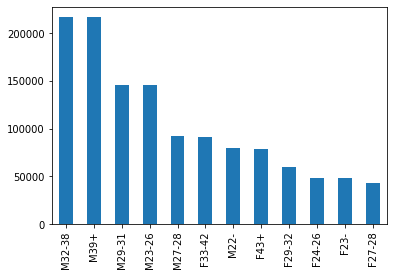

In [59]:
train_brand_2.group.value_counts().sort_values(ascending=False).plot('bar')

In [60]:
train_brand_3 = train_brand_2.drop(['timestamp','longitude','latitude'],axis=1)
print(train_brand_3.shape)
train_brand_3.head()

(1266931, 9)


,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0
3,-4938849341048082022,M,30,M29-31,xiaomi,??note,NaN,NaN,NaN
4,245133531816851882,M,30,M29-31,xiaomi,MI 3,NaN,NaN,NaN


# MERGING TRAIN BRAND WITH APP EVENTS ON EVENT ID

In [61]:
train_brand_4 = train_brand_3.merge(app_events, on = 'event_id',how = 'left')
print(train_brand_4.shape)
train_brand_4.head()

(5502490, 12)


,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday,app_id,is_installed,is_active
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,1.0,1.0
3,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,1.0,1.0
4,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,1.0,1.0


In [62]:
len(train_brand_4['device_id'].unique())

74645

In [63]:
len(train_brand_4['app_id'].unique())

6914

In [64]:
len(train_brand_4['event_id'].unique())

1215596

In [65]:
len(train_brand_4['phone_brand'].unique())

80

# MERGING APP LABEL WITH LABEL CATEGORY

In [66]:
app_label_category = app_label.merge(label_categories,on = 'label_id',how = 'left')
print(app_label_category.shape)
app_label_category.head()

(459452, 3)


,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [67]:
len(app_label_category['app_id'].unique())

113211

In [68]:
len(app_label_category['category'].unique())

473

In [69]:
app_label_category_1 = app_label_category.drop(['label_id'],axis = 1)
app_label_category_1.shape

(459452, 2)

# MERGING TRAIN BRAND 4 WITH APP LABEL CATEGORY 1

In [70]:
train_brand_5 = train_brand_4.merge(app_label_category_1,on = 'app_id',how = 'left')
print(train_brand_5.shape)
train_brand_5.head()

(5686499, 13)


,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday,app_id,is_installed,is_active,category
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,1.0,1.0,NaN
3,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,1.0,1.0,NaN
4,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,1.0,1.0,NaN


In [71]:
print('THE NUMBER OF UNIQUE DEVICES ARE ',len(train_brand_5['device_id'].unique()))
print('THE NUMBER OF UNIQUE PHONE BRANDS  ARE ',len(train_brand_5['phone_brand'].unique()))
print('THE NUMBER OF UNIQUE DEVICE MODELS  ARE ',len(train_brand_5['device_model'].unique()))
print('THE NUMBER OF UNIQUE APPS  ARE ',len(train_brand_5['app_id'].unique()))
print('THE NUMBER OF UNIQUE EVENTS  ARE ',len(train_brand_5['event_id'].unique()))
print('THE NUMBER OF UNIQUE CATEGORIES   ARE ',len(train_brand_5['category'].unique()))


THE NUMBER OF UNIQUE DEVICES ARE  74645
THE NUMBER OF UNIQUE PHONE BRANDS  ARE  80
THE NUMBER OF UNIQUE DEVICE MODELS  ARE  1404
THE NUMBER OF UNIQUE APPS  ARE  6914
THE NUMBER OF UNIQUE EVENTS  ARE  1215596
THE NUMBER OF UNIQUE CATEGORIES   ARE  95


In [72]:
final_train = train_brand_5.drop(['is_installed','is_active'],axis = 1)
print(final_train.shape)
final_train.head()

(5686499, 11)


,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday,app_id,category
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN,NaN,NaN
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,NaN,NaN,NaN,NaN,NaN
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,NaN
3,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,NaN
4,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,NaN


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


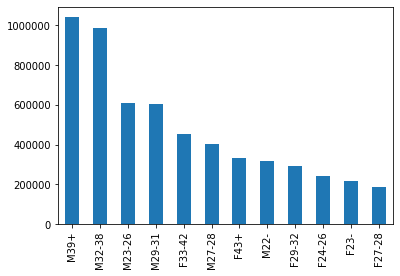

In [73]:
final_train.group.value_counts().sort_values(ascending=False).plot('bar')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


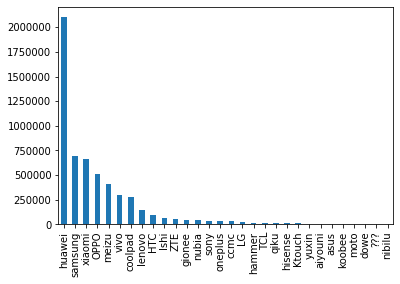

In [74]:
final_train.phone_brand.value_counts()[:30].sort_values(ascending=False).plot('bar')

THE MIX OF THE DATA WAS NOT CHANGED AFTER MERGING ALL THE DATASETS.THE GROUP CATEGORY WHERE MALE GROUPS ARE COMPARABLY MORE TO THE FEMALE GROUPS AND THE TOP PHONE BRANDS USED WHICH ARE RELATIVELY SAME AS TRAIN BRAND DATAFRAME

# CHECKING FOR MISSING VALUES

In [75]:
final_train.isnull().any()

device_id       False
gender          False
age             False
group           False
phone_brand     False
device_model    False
event_id         True
hour             True
weekday          True
app_id           True
category         True
dtype: bool

In [76]:
final_train['weekday'].value_counts()

4.0    845763
3.0    834779
1.0    829610
2.0    807250
5.0    785758
0.0    772764
6.0    759239
Name: weekday, dtype: int64

# FILLING THE MISSING VALUES WITH ZERO

In [77]:
final_train_1 = final_train.fillna(0)
print(final_train_1.shape)
final_train_1.head()

(5686499, 11)


,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday,app_id,category
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0
3,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0
4,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0


In [78]:
final_train_1.isnull().any()

device_id       False
gender          False
age             False
group           False
phone_brand     False
device_model    False
event_id        False
hour            False
weekday         False
app_id          False
category        False
dtype: bool

In [79]:
len(final_train_1['device_id'].unique())

74645

In [80]:
len(final_train_1['phone_brand'].unique())

80

In [81]:
len(final_train_1['app_id'].unique())

6914

In [82]:
len(final_train_1['event_id'].unique())

1215596

In [83]:
len(final_train_1['weekday'].unique())

7

In [84]:
final_train_1['weekday'].value_counts()

4.0    845763
3.0    834779
1.0    829610
0.0    824100
2.0    807250
5.0    785758
6.0    759239
Name: weekday, dtype: int64

In [85]:
final_train_1['hour'].value_counts()

10.0    310627
21.0    309312
20.0    299452
9.0     295306
12.0    293420
11.0    289158
19.0    289126
22.0    284831
8.0     281081
18.0    273913
13.0    273517
17.0    269075
14.0    267037
16.0    263872
15.0    260326
7.0     256069
0.0     251439
23.0    234726
6.0     202852
1.0     122895
5.0     113275
2.0      90684
3.0      77836
4.0      76670
Name: hour, dtype: int64

# MERGING ALL FILES WITH TEST BRAND

In [86]:
test_brand_2 = test_brand.merge(events, on ='device_id',how = 'left')
test_brand_2.shape

(2021699, 9)

In [87]:
test_brand_3 = test_brand_2.drop(['longitude','latitude'],axis = 1)
print(test_brand_3.shape)
test_brand_3.head()

(2021699, 7)


,device_id,phone_brand,device_model,event_id,timestamp,hour,weekday
0,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0
1,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0
2,1002079943728939269,xiaomi,xiaominote,1171252.0,2016-05-02 08:20:02,8.0,0.0
3,1002079943728939269,xiaomi,xiaominote,1805074.0,2016-05-01 16:33:52,16.0,6.0
4,1002079943728939269,xiaomi,xiaominote,2145937.0,2016-05-05 08:28:20,8.0,3.0


In [88]:
test_brand_4 = test_brand_3.merge(app_events, on = 'event_id',how = 'left')
print(test_brand_4.shape)
test_brand_4.head()

(8755527, 10)


,device_id,phone_brand,device_model,event_id,timestamp,hour,weekday,app_id,is_installed,is_active
0,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,6.965654e+18,1.0,1.0
1,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,-5.380614e+17,1.0,1.0
2,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,6.965654e+18,1.0,1.0
3,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,-5.380614e+17,1.0,1.0
4,1002079943728939269,xiaomi,xiaominote,1171252.0,2016-05-02 08:20:02,8.0,0.0,6.965654e+18,1.0,1.0


In [89]:
len(test_brand_4['device_id'].unique())

112071

In [90]:
len(test_brand_4['phone_brand'].unique())

80

In [91]:
test_brand_5 = test_brand_4.merge(app_label_category_1,on = 'app_id',how = 'left')
print(test_brand_5.shape)
test_brand_5.head()

(9044860, 11)


,device_id,phone_brand,device_model,event_id,timestamp,hour,weekday,app_id,is_installed,is_active,category
0,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,6.965654e+18,1.0,1.0,NaN
1,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,-5.380614e+17,1.0,1.0,NaN
2,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,6.965654e+18,1.0,1.0,NaN
3,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,-5.380614e+17,1.0,1.0,NaN
4,1002079943728939269,xiaomi,xiaominote,1171252.0,2016-05-02 08:20:02,8.0,0.0,6.965654e+18,1.0,1.0,NaN


In [92]:
final_test = test_brand_5.drop(['is_installed','is_active'],axis = 1)
print(final_test.shape)
final_test.head()

(9044860, 9)


,device_id,phone_brand,device_model,event_id,timestamp,hour,weekday,app_id,category
0,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,6.965654e+18,NaN
1,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,-5.380614e+17,NaN
2,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,6.965654e+18,NaN
3,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,-5.380614e+17,NaN
4,1002079943728939269,xiaomi,xiaominote,1171252.0,2016-05-02 08:20:02,8.0,0.0,6.965654e+18,NaN


In [93]:
len(final_test['device_id'].unique())

112071

In [94]:
len(final_test['app_id'].unique())

8726

In [95]:
len(final_test['event_id'].unique())

1944823

In [96]:
len(final_test['phone_brand'].unique())

80

In [97]:
len(final_test['weekday'].unique())

8

In [98]:
len(final_test['category'].unique())

114

In [99]:
final_test['weekday'].value_counts()

4.0    1343551
1.0    1320830
3.0    1307059
2.0    1276168
5.0    1252253
0.0    1237271
6.0    1230851
Name: weekday, dtype: int64

In [100]:
final_test['hour'].value_counts()

10.0    490682
21.0    489601
20.0    485832
11.0    466452
12.0    463079
19.0    461742
22.0    457795
9.0     457141
18.0    441020
13.0    437804
8.0     437703
14.0    426853
17.0    425805
15.0    419874
16.0    417840
7.0     403636
23.0    366818
6.0     324823
0.0     316640
1.0     193061
5.0     187445
2.0     144980
3.0     127111
4.0     124246
Name: hour, dtype: int64

# CHECKING FOR MISSING VALUES AND FILLING WITH ZEROES

In [101]:
final_test.isnull().any()

device_id       False
phone_brand     False
device_model    False
event_id         True
timestamp        True
hour             True
weekday          True
app_id           True
category         True
dtype: bool

In [102]:
final_test_1 = final_test.fillna(0)
print(final_test_1.shape)
final_test_1.head()

(9044860, 9)


,device_id,phone_brand,device_model,event_id,timestamp,hour,weekday,app_id,category
0,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,6.965654e+18,0
1,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,-5.380614e+17,0
2,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,6.965654e+18,0
3,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,-5.380614e+17,0
4,1002079943728939269,xiaomi,xiaominote,1171252.0,2016-05-02 08:20:02,8.0,0.0,6.965654e+18,0


THE MIX OF THE DATA WAS NOT CHANGED AFTER MERGING ALL THE DATASETS.THE TOP PHONE BRANDS USED WHICH ARE RELATIVELY SAME AS Test BRAND DATAFRAME AND NUMBER OF UNIQUE DEVICE ID'S ARE SAME AS GIVEN IN TEST DATA.

In [103]:
import pickle
with open('train', 'wb') as fp:
     pickle.dump(final_train_1, fp)

In [104]:
import pickle
with open('test', 'wb') as fp:
     pickle.dump(final_test_1, fp)

In [2]:
import pickle
with open('train', 'rb') as fp:
    final_train_1 = pickle.load(fp)

In [3]:
import pickle
with open('test', 'rb') as fp:
    final_test_1 = pickle.load(fp)

In [4]:
print(final_train_1.shape)
print(final_test_1.shape)

(5686499, 11)
(9044860, 9)


# EDA

In [106]:
final_train_1.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday,app_id,category
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0
3,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0
4,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0


In [107]:
final_train_1['group'].value_counts()

M39+      1041412
M32-38     988546
M23-26     608801
M29-31     604152
F33-42     453849
M27-28     402929
F43+       330655
M22-       316813
F29-32     291727
F24-26     243302
F23-       218119
F27-28     186194
Name: group, dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


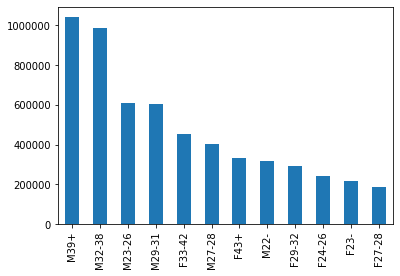

In [108]:
final_train_1.group.value_counts().sort_values(ascending=False).plot('bar')

MALE USERS ARE MORE COMPARED TO FEMALE USERS

# CATEGORIES

In [109]:
unique_categories = final_train_1['category'].value_counts()
print('Number of Unique categories :', unique_categories.shape[0])
# the top 10 brands that occured most
print(unique_categories.head(10))

Number of Unique categories : 95
0                     5479280
Wealth Management       11801
P2P                     11483
P2P net loan            11354
Custom label            11338
And the Church          11096
Internet banking        11073
Low liquidity           10956
Financial Services      10944
Low income              10944
Name: category, dtype: int64


In [110]:
unique_test_categories = final_test_1['category'].value_counts()
print('Number of Unique categories :', unique_test_categories.shape[0])
# the top 10 brands that occured most
print(unique_test_categories.head(10))

Number of Unique categories : 114
0                    8717585
Wealth Management      17977
P2P                    17813
Custom label           17698
P2P net loan           17543
And the Church         17191
Internet banking       17067
Low liquidity          16891
Low Risk               16797
Low income             16797
Name: category, dtype: int64


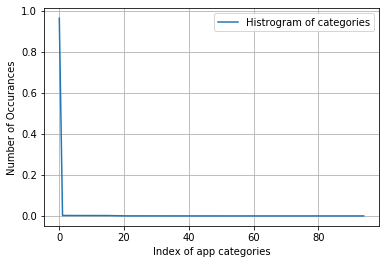

In [111]:
#pdf of categories
s = sum(unique_categories.values);
h = unique_categories.values/s;
plt.plot(h, label="Histrogram of categories")
plt.xlabel('Index of app categories')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.96355948 0.96563474 0.96765409 0.96965075 0.97164459 0.97359588
 0.97554312 0.97746979 0.97939435 0.98131891 0.98324347 0.98511562
 0.98692992 0.98874017 0.99055042 0.99233799 0.99381711 0.99499956
 0.99585932 0.99666473 0.99693379 0.99714288 0.99734599 0.99754805
 0.99774888 0.99794337 0.998134   0.99832111 0.99850822 0.99868935
 0.99883162 0.99897389 0.99909276 0.99917788 0.99926088 0.99932577
 0.99938838 0.99944078 0.99948984 0.9995324  0.99957496 0.99960925
 0.99964354 0.99967783 0.9997072  0.99973323 0.99975767 0.99978088
 0.9998041  0.99982713 0.99984507 0.99985826 0.99987092 0.99988306
 0.99989519 0.99990715 0.99991612 0.99992491 0.9999323  0.99993933
 0.99994619 0.99995182 0.99995744 0.99996219 0.99996624 0.99997028
 0.99997292 0.99997556 0.99997784 0.99998013 0.99998224 0.99998417
 0.99998611 0.99998804 0.99998962 0.99999103 0.99999191 0.99999279
 0.99999367 0.99999437 0.9999949  0.99999543 0.99999596 0.99999648
 0.99999701 0.99999754 0.99999807 0.99999842 0.99999877 0.9999

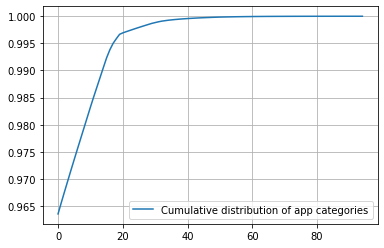

In [112]:
#cdf of phone brand
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of app categories')
plt.grid()
plt.legend()
plt.show()

 20 CATEGORIES ACCOUNT FOR MORE THAN 99.5% USERS

# APP IDS

In [113]:
unique_apps = final_train_1['app_id'].value_counts()
print('Number of Unique categories :', unique_apps.shape[0])
# the top 10 brands that occured most
print(unique_apps.head(10))

Number of Unique categories : 6914
 0.000000e+00    711652
 8.693964e+18    350672
 5.927333e+18    235059
 4.348660e+18    164969
-4.986140e+15    152475
 3.433290e+18    147057
 6.280209e+17    136099
 6.284165e+18    103677
 8.948670e+18     99963
-3.955213e+18     93338
Name: app_id, dtype: int64


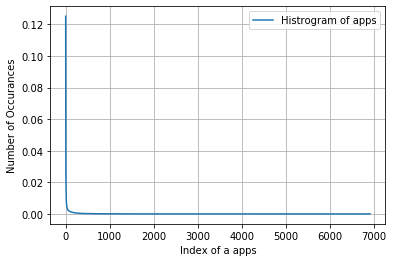

In [114]:
#pdf of app
s = sum(unique_apps.values);
h = unique_apps.values/s;
plt.plot(h, label="Histrogram of apps")
plt.xlabel('Index of a apps')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

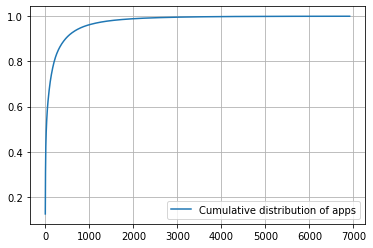

In [115]:
#cdf of phone brand
c = np.cumsum(h)
#print(c)
plt.plot(c,label='Cumulative distribution of apps')
plt.grid()
plt.legend()
plt.show()

1000 APPS ACCOUNT FOR MORE THAN 95% OF USERS

# PHONE BRAND

In [116]:
unique_brands = final_train_1['phone_brand'].value_counts()
print('Number of Unique brands :', unique_brands.shape[0])
# the top 10 brands that occured most
print(unique_brands.head(10))

Number of Unique brands : 80
huawei     2100132
samsung     697319
xiaomi      665984
OPPO        513802
meizu       414998
vivo        299541
coolpad     282937
lenovo      150074
HTC          91801
lshi         66013
Name: phone_brand, dtype: int64


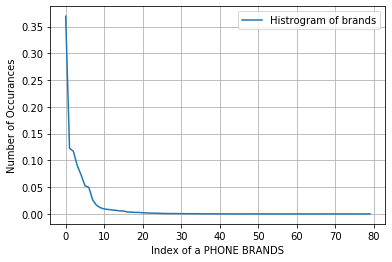

In [117]:
#pdf of phone brand
s = sum(unique_brands.values);
h = unique_brands.values/s;
plt.plot(h, label="Histrogram of brands")
plt.xlabel('Index of a PHONE BRANDS')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.36931898 0.4919461  0.6090628  0.69941752 0.77239704 0.82507286
 0.87482878 0.90122007 0.91736374 0.92897247 0.93819818 0.94660106
 0.95398979 0.96071924 0.96637738 0.97181289 0.97530572 0.97864275
 0.98149441 0.9842775  0.98635769 0.98828928 0.98983522 0.99124646
 0.99247076 0.99338011 0.99416284 0.99487417 0.99551499 0.99614191
 0.99661233 0.99703209 0.99742671 0.99782063 0.99820733 0.99847463
 0.99863396 0.99878396 0.99892746 0.99905214 0.9991566  0.99923134
 0.99930572 0.99937448 0.99943498 0.99948826 0.99954067 0.99958903
 0.99963686 0.99968135 0.99971564 0.99974712 0.99977737 0.9998048
 0.9998259  0.99984454 0.99986125 0.9998762  0.99989079 0.99990539
 0.99991911 0.99993159 0.99994302 0.99995428 0.99996536 0.99997151
 0.99997749 0.99998294 0.99998628 0.99998945 0.99999226 0.99999455
 0.99999648 0.99999771 0.99999877 0.9999993  0.99999947 0.99999965
 0.99999982 1.        ]


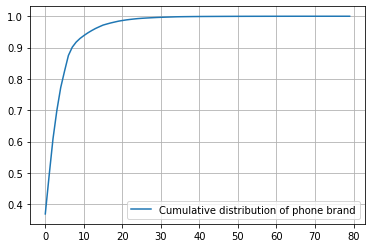

In [118]:
#cdf of phone brand
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of phone brand')
plt.grid()
plt.legend()
plt.show()

10 BRANDS ACCOUNT FOR MORE THAN 95% OF USERS

# PLOTTING HISTOGRAM FOR TOP 10 BRANDS

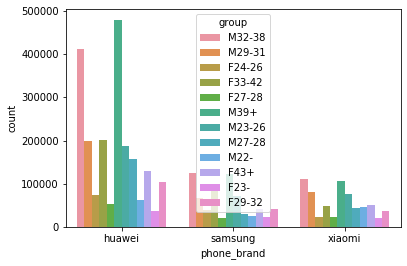

In [119]:
sns.countplot(data = final_train_1, x = 'phone_brand',hue = 'group' ,order=['huawei','samsung','xiaomi'])

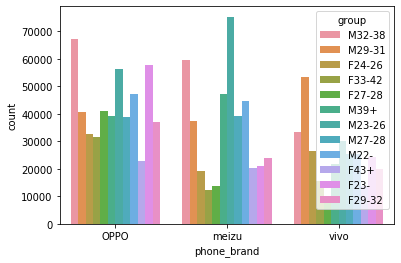

In [120]:
sns.countplot(data = final_train_1, x = 'phone_brand',hue = 'group' ,order=['OPPO','meizu','vivo'])

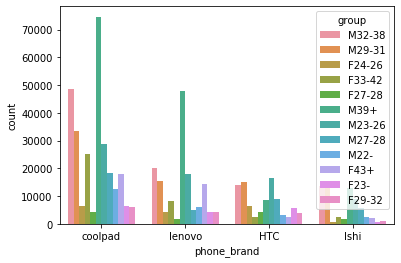

In [121]:
sns.countplot(data = final_train_1, x = 'phone_brand',hue = 'group' ,order=['coolpad','lenovo','HTC','lshi'])

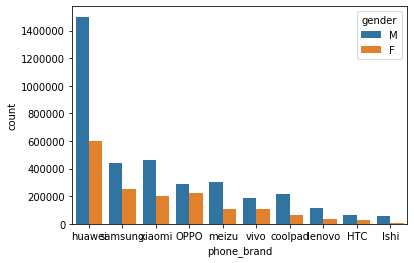

In [122]:
sns.countplot(data = final_train_1, x = 'phone_brand',hue = 'gender' ,order=['huawei','samsung','xiaomi','OPPO','meizu','vivo','coolpad','lenovo','HTC','lshi'])

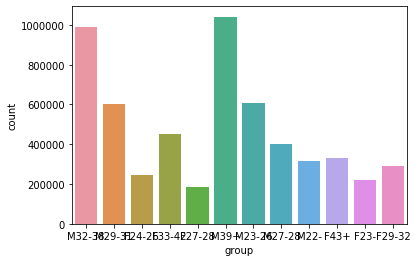

In [123]:
sns.countplot(data = final_train_1, x = 'group')

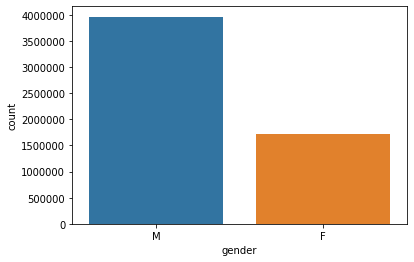

In [124]:
sns.countplot(data = final_train_1, x = 'gender')

# BOX PLOT OF HOUR VS AGE

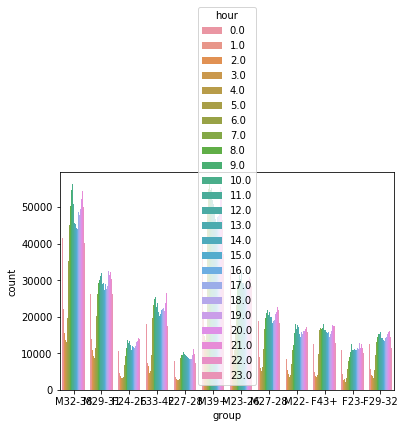

In [125]:
sns.countplot(x='group', hue='hour', data=final_train_1)

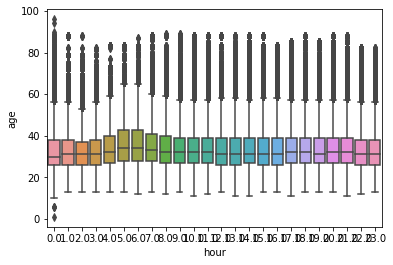

In [126]:
sns.boxplot(data = final_train_1, x='hour', y='age')

# BOX PLOT OF HOUR VS GROUP

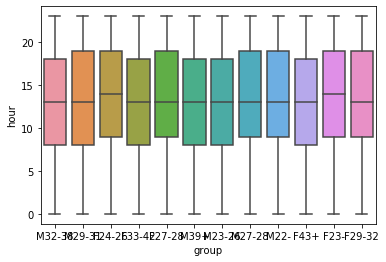

In [127]:
sns.boxplot(data = final_train_1, y='hour', x='group')

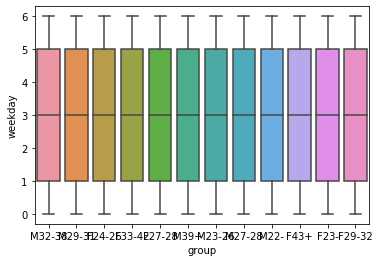

In [128]:
sns.boxplot(data = final_train_1, y='weekday', x='group')

# BOX PLOT OF GENDER VS HOUR

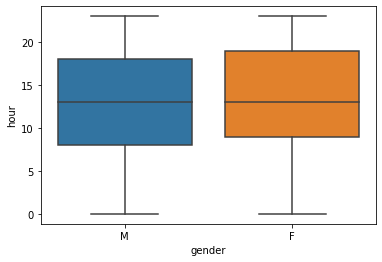

In [129]:
sns.boxplot(data = final_train_1, y='hour', x='gender')

# BOXPLOT OF WEEKDAY VS AGE

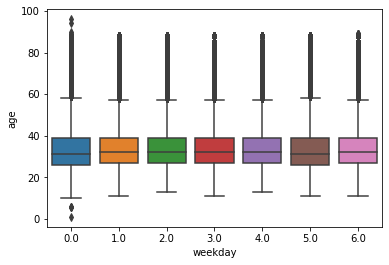

In [130]:
sns.boxplot(data = final_train_1, x='weekday', y='age')

FROM THE PLOTS WE CANNOT DRAW ANY CONCLUSIONS AS ALL THE FEATURES ARE OVERLAPPING

# ONE HOT ENCODING OF CATEGORICAL VARIABLES IN TRAIN DATA and TEST DATA

In [5]:
print(final_train_1.shape)
final_train_1.head()

(5686499, 11)


,device_id,gender,age,group,phone_brand,device_model,event_id,hour,weekday,app_id,category
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0
3,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0
4,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0


In [6]:
print(final_test_1.shape)
final_test_1.head()

(9044860, 9)


,device_id,phone_brand,device_model,event_id,timestamp,hour,weekday,app_id,category
0,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,6.965654e+18,0
1,1002079943728939269,xiaomi,xiaominote,460577.0,2016-05-03 21:06:29,21.0,1.0,-5.380614e+17,0
2,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,6.965654e+18,0
3,1002079943728939269,xiaomi,xiaominote,755837.0,2016-05-05 22:15:16,22.0,3.0,-5.380614e+17,0
4,1002079943728939269,xiaomi,xiaominote,1171252.0,2016-05-02 08:20:02,8.0,0.0,6.965654e+18,0


In [7]:
y = final_train_1['group']
print(y.shape)

(5686499,)


In [8]:
train_data = final_train_1.drop(['age','gender'],axis = 1)
print(train_data.shape)
train_data.head()

(5686499, 9)


,device_id,group,phone_brand,device_model,event_id,hour,weekday,app_id,category
0,-8076087639492063270,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
1,-2897161552818060146,M32-38,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0
2,-8260683887967679142,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0
3,-8260683887967679142,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0
4,-8260683887967679142,M32-38,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0


In [9]:
test_data = final_test_1.drop(['timestamp'],axis = 1)
print(test_data.shape)
test_data.head()

(9044860, 8)


,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category
0,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,6.965654e+18,0
1,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,-5.380614e+17,0
2,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,6.965654e+18,0
3,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,-5.380614e+17,0
4,1002079943728939269,xiaomi,xiaominote,1171252.0,8.0,0.0,6.965654e+18,0


In [10]:
len(train_data['phone_brand'].unique())

80

In [11]:
len(test_data['phone_brand'].unique())

80

In [12]:
len(train_data['device_model'].unique())

1404

In [13]:
len(test_data['device_model'].unique())

1488

In [14]:
len(test_data['category'].unique())

114

In [15]:
len(train_data['category'].unique())

95

In [16]:
import pandas as pd
train_data_1 = pd.get_dummies(train_data,columns = ['group'])
print(train_data_1.shape)
train_data_1.head()

(5686499, 20)


,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,group_F23-,group_F24-26,group_F27-28,group_F29-32,group_F33-42,group_F43+,group_M22-,group_M23-26,group_M27-28,group_M29-31,group_M32-38,group_M39+
0,-8076087639492063270,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-2897161552818060146,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0,0,0,0,0,0,0,0,0,0,0,1,0


# LABEL ENCODING OF PHONE BRAND

In [17]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

train_data_1['phone_brand_en'] = le.fit_transform(train_data_1.phone_brand.values)
train_data_1.head()

,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,group_F23-,group_F24-26,...,group_F29-32,group_F33-42,group_F43+,group_M22-,group_M23-26,group_M27-28,group_M29-31,group_M32-38,group_M39+,phone_brand_en
0,-8076087639492063270,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,...,0,0,0,0,0,0,0,1,0,75
1,-2897161552818060146,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,...,0,0,0,0,0,0,0,1,0,75
2,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0,0,0,...,0,0,0,0,0,0,0,1,0,75
3,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0,0,0,...,0,0,0,0,0,0,0,1,0,75
4,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0,0,0,...,0,0,0,0,0,0,0,1,0,75


In [18]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

test_data['phone_brand_en'] = le.fit_transform(test_data.phone_brand.values)
test_data.head()

,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,phone_brand_en
0,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,6.965654e+18,0,75
1,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,-5.380614e+17,0,75
2,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,6.965654e+18,0,75
3,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,-5.380614e+17,0,75
4,1002079943728939269,xiaomi,xiaominote,1171252.0,8.0,0.0,6.965654e+18,0,75


# LABEL ENCODING OF DEVICE MODEL

In [19]:
le = preprocessing.LabelEncoder()
train_data_1['device_model_en'] = le.fit_transform(train_data_1.device_model.values)
train_data_1.head()

,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,group_F23-,group_F24-26,...,group_F33-42,group_F43+,group_M22-,group_M23-26,group_M27-28,group_M29-31,group_M32-38,group_M39+,phone_brand_en,device_model_en
0,-8076087639492063270,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,...,0,0,0,0,0,0,1,0,75,779
1,-2897161552818060146,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,...,0,0,0,0,0,0,1,0,75,779
2,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0,0,0,...,0,0,0,0,0,0,1,0,75,779
3,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0,0,0,...,0,0,0,0,0,0,1,0,75,779
4,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0,0,0,...,0,0,0,0,0,0,1,0,75,779


In [20]:
le = preprocessing.LabelEncoder()
test_data['device_model_en'] = le.fit_transform(test_data.device_model.values)
print(test_data.shape)
test_data.head()

(9044860, 10)


,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,phone_brand_en,device_model_en
0,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,6.965654e+18,0,75,1487
1,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,-5.380614e+17,0,75,1487
2,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,6.965654e+18,0,75,1487
3,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,-5.380614e+17,0,75,1487
4,1002079943728939269,xiaomi,xiaominote,1171252.0,8.0,0.0,6.965654e+18,0,75,1487


# LABEL ENCODING OF CATEGORY 

In [21]:
train_data_1['category'] = train_data_1['category'].astype(str)

In [22]:
le = preprocessing.LabelEncoder()
train_data_1['category_en'] = le.fit_transform(train_data_1.category.values)
train_data_1.head()

,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,group_F23-,group_F24-26,...,group_F43+,group_M22-,group_M23-26,group_M27-28,group_M29-31,group_M32-38,group_M39+,phone_brand_en,device_model_en,category_en
0,-8076087639492063270,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,...,0,0,0,0,0,1,0,75,779,0
1,-2897161552818060146,xiaomi,MI 2,0.0,0.0,0.0,0.000000e+00,0,0,0,...,0,0,0,0,0,1,0,75,779,0
2,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.772885e+17,0,0,0,...,0,0,0,0,0,1,0,75,779,0
3,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,8.096758e+18,0,0,0,...,0,0,0,0,0,1,0,75,779,0
4,-8260683887967679142,xiaomi,MI 2,2479656.0,14.0,6.0,1.665047e+18,0,0,0,...,0,0,0,0,0,1,0,75,779,0


In [23]:
test_data['category'] = test_data['category'].astype(str)

In [24]:
le = preprocessing.LabelEncoder()
test_data['category_en'] = le.fit_transform(test_data.category.values)
print(test_data.shape)
test_data.head()

(9044860, 11)


,device_id,phone_brand,device_model,event_id,hour,weekday,app_id,category,phone_brand_en,device_model_en,category_en
0,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,6.965654e+18,0,75,1487,0
1,1002079943728939269,xiaomi,xiaominote,460577.0,21.0,1.0,-5.380614e+17,0,75,1487,0
2,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,6.965654e+18,0,75,1487,0
3,1002079943728939269,xiaomi,xiaominote,755837.0,22.0,3.0,-5.380614e+17,0,75,1487,0
4,1002079943728939269,xiaomi,xiaominote,1171252.0,8.0,0.0,6.965654e+18,0,75,1487,0


# GROUPBY DEVICEID AND SUM

In [25]:
final_train_data = train_data_1.groupby('device_id').sum()

In [26]:
print(final_train_data.shape)

(74645, 19)


In [27]:
final_test_data = test_data.groupby('device_id').sum()

In [28]:
print(final_test_data.shape)

(112071, 7)


In [30]:
import pickle
with open('final_train', 'wb') as fp:
     pickle.dump(final_train_data, fp)

In [31]:
import pickle
with open('final_test', 'wb') as fp:
     pickle.dump(final_test_data, fp)